In [1]:
# Para conocer el enunciado del problema, consultar el libro:
# Metodos Numericos Aplicados a la Ingeniería: Casos de estudio utilizando MATLAB (2014)
# por Héctor Jorquera y Claudio Gelmi
# 
# Código Python escrito por Claudio Gelmi, Ph.D.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

In [2]:
# Modelo del biorreactor
def bioreact(t, x):
    # Parameters
    mumax = 0.53  # (1/h)
    km = 0.12     # (g/L)
    k1 = 0.45     # (L/g)
    Y = 0.4       #
    x2f = 4.0     # (g/L)
    D = 0.3       # (1/h)
    V = 1.0       # (L)
    
    # Velocidades específicas de crecimiento
    mu1 = mumax*x[1]/(km + x[1])
    mu2 = mumax*x[3]/(km + x[3] + k1*x[3]**2)
    # Variables de estado: cinética de Monod
    dx1 = (mu1 - D)*x[0]
    dx2 = D*(x2f - x[1]) - mu1*x[0]/Y
    # Variables de estado: inhibición por sustrato
    dx3 = (mu2 - D)*x[2]
    dx4 = D*(x2f - x[3]) - mu2*x[2]/Y
    # Biomasa que abandona el biorreactor
    dx5 = D*V*x[0]
    dx6 = D*V*x[2]
    return [dx1, dx2, dx3, dx4, dx5, dx6]

# Condiciones iniciales para (Monod e inhibición): biomasa, glucosa y biomasa que ha abandonado el biorreactor
X0 = [0.75, 2.0, 0.75, 2.0, 0.0, 0.0]

# Tiempos de integración
t_span = (0, 30)
t_eval = np.linspace(t_span[0], t_span[1], 100) # Puntos de evaluación

# Resolución del sistema de ecuaciones
sol = solve_ivp(bioreact, t_span, X0, t_eval=t_eval, atol=1e-8, rtol=1e-8, method='RK45')

# Extracción de los resultados
t = sol.t
y = sol.y

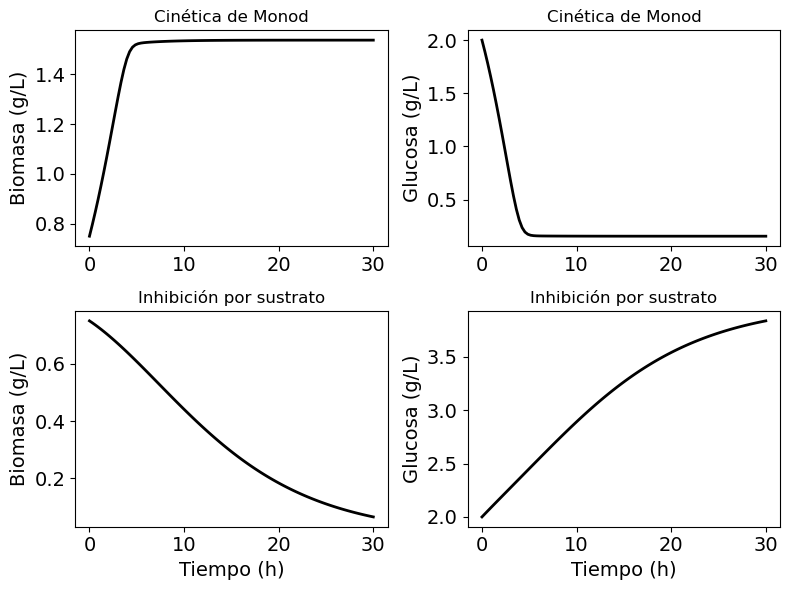

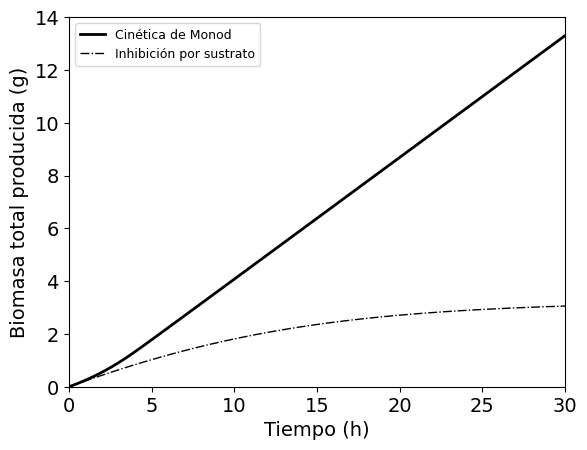

In [3]:
# Gráfica de resultados
plt.figure(1, figsize=(8,6))

plt.subplot(2, 2, 1)
plt.plot(t, y[0], 'k', lw=2)
plt.ylabel('Biomasa (g/L)', fontsize=14)
plt.tick_params(axis='both', labelsize=14)
plt.title('Cinética de Monod', fontsize=12)

plt.subplot(2, 2, 2)
plt.plot(t, y[1], 'k', lw=2)
plt.ylabel('Glucosa (g/L)', fontsize=14)
plt.tick_params(axis='both', labelsize=14)
plt.title('Cinética de Monod', fontsize=12)

plt.subplot(2, 2, 3)
plt.plot(t, y[2], 'k', lw=2)
plt.xlabel('Tiempo (h)', fontsize=14)
plt.ylabel('Biomasa (g/L)', fontsize=14)
plt.title('Inhibición por sustrato', fontsize=12)
plt.tick_params(axis='both', labelsize=14)

plt.subplot(2, 2, 4)
plt.plot(t, y[3], 'k', lw=2)
plt.xlabel('Tiempo (h)', fontsize=14)
plt.ylabel('Glucosa (g/L)', fontsize=14)
plt.title('Inhibición por sustrato', fontsize=12)
plt.tick_params(axis='both', labelsize=14)
plt.tight_layout()

plt.figure(2)
plt.plot(t, y[4], 'k', lw=2, label='Cinética de Monod')
plt.plot(t, y[5], 'k-.', lw=1, label='Inhibición por sustrato')
plt.xlabel('Tiempo (h)', fontsize=14)
plt.xlim(0, 30)
plt.ylabel('Biomasa total producida (g)', fontsize=14)
plt.ylim(0, 14)
plt.legend(fontsize=9)
plt.tick_params(axis='both', labelsize=14)

plt.show()

In [4]:
# Último valor de las variables de estado
ultimo_valor = y[:, -1]
print("Último valor al finalizar fermentación:\n", ultimo_valor)

# Cálculo de la biomada total producida
biomasa_producida_monod = y[4, -1] + 1*(y[0, -1] - X0[0])
print(f'\nMonod, biomasa total =', round(biomasa_producida_monod,2))
biomasa_producida_inhibicion = y[5, -1] + 1*(y[2, -1] - X0[2])
print(f'Inhibición, biomasa total =', round(biomasa_producida_inhibicion,2))

Último valor al finalizar fermentación:
 [ 1.53738449  0.15652334  0.06492681  3.83766755 13.29834724  3.05518169]

Monod, biomasa total = 14.09
Inhibición, biomasa total = 2.37
